# ROCCO Demonstration

This notebook consists of two sections.
1. BAM Preprocessing
1. Running Rocco

The first section walks through the BAM-->WIG pipeline to generate ROCCO conformable input from a collection of samples' BAM files.

The second section provides usage examples for running ROCCO on multiple chromosomes and analyzing results.

**Download Input Alignments:** To acquire the ATAC-seq alignments (human lymphoblast) used for this demo, run
```
xargs -L 1 curl -O -J -L < demo_files/bam_links.txt
```
at the command line.

These files are are obtained from the [ENCODE](https://www.encodeproject.org/search/?type=Experiment&control_type%21=%2A&status=released&perturbed=false&assay_title=ATAC-seq&biosample_ontology.cell_slims=lymphoblast&audit.ERROR.category%21=extremely+low+read+depth&audit.NOT_COMPLIANT.category%21=low+FRiP+score&audit.NOT_COMPLIANT.category%21=poor+library+complexity&audit.NOT_COMPLIANT.category%21=severe+bottlenecking&audit.WARNING.category%21=moderate+library+complexity&audit.WARNING.category%21=mild+to+moderate+bottlenecking&audit.WARNING.category%21=moderate+number+of+reproducible+peaks) project.

## BAM Processing
The downloaded alignment files have already been QC-processed with the [ENCODE ATAC-seq pipeline](https://www.encodeproject.org/atac-seq/). This particular preprocessing protocol is not required, but we assume the BAM files used as input to ROCCO have already been preprocessed according to some QC standard---duplicate removal, adapter trimming, etc.

### `prep_bams.py`
This script generates a smooth signal track for each sample's BAM file and then divides each into chromosome-specific directories `tracks_<chromosome name>`, thereby providing ROCCO conformable input.

The script performs the following steps:
1. Create local links to the BAM files (and associated `.bai` files if they exist) in the directory specified by command-line arg `-i`/`--bamdir`. If the BAM files are present in the current directory, this parameter doesn't need to be specified, and no links are created. *Optional*: if the BAM files have not yet been indexed, invoke the `--index` command-line argument to call Pysam
1. For each BAM file, check if sorted by coordinates--if not, [Pysam](https://github.com/pysam-developers/pysam) is called for sorting.
1. Call [PEPATAC's](https://github.com/databio/pepatac) `bamSitesToWig.py` script to generate a smooth fixed-interval signal track for each sample/replicate. Note, if this script is not already present current working directory, it will be downloaded via `wget`.
1. Divide the replicate's signal track by chromosome and place resulting subtracks into the chromosome-specific directories `tracks_<chromosome name>`

See the [flowchart](https://github.com/nolan-h-hamilton/ROCCO/blob/main/docs/bamsig_flowchart.png) for a visualization.

Since the downloaded alignments have not yet been indexed, we use the script's `--index` parameter. Note that these BAM files from ENCODE have already been sorted by coordinates.

Users with the necessary computational resources are encouraged to make use of the `--cores` command.

In [2]:
!python prep_bams.py -i . --index 

{'bamdir': '.', 'sizes': 'hg38', 'interval_length': 50, 'cores': 1, 'index': True, 'retain_links': False}

Cannot find bamSitesToWig.py in working directory...downloading        via wget
--2023-05-13 00:11:12--  https://raw.githubusercontent.com/databio/pepatac/master/tools/bamSitesToWig.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17351 (17K) [text/plain]
Saving to: ‘bamSitesToWig.py’

bamSitesToWig.py    100%[===================>]  16.94K  --.-KB/s    in 0.001s  

2023-05-13 00:11:12 (13.4 MB/s) - ‘bamSitesToWig.py’ saved [17351/17351]


Cannot find cutsToWig.pl in working directory...downloading        via wget
--2023-05-13 00:11:12--  https://raw.githubusercontent.com/databio/pepatac/master/tools/cutsToWig.pl
Resolving raw.githubuse

## Running ROCCO
In this section we run ROCCO and analyze results.
### Run on Multiple Chromosomes 
`ROCCO.py` will look for chromosome-specific parameters in the CSV file specified with the `-p` argument, in our case, `demo_files/demo_params.csv`. Since a `NULL` entry is present in each cell in this file, the genome-wide defaults will be used. To run ROCCO with chromosome-specific parameters, this file can be modified accordingly, replacing `NULL` with the desired parameter value for the corresponding chromosome in each row.

In [3]:
!python ROCCO.py -p demo_files/demo_params.csv 


ROCCO: ['chr20', 'tracks_chr20', '0.035', '1.0', '0.0', '1.0', '1.0', '1.0']

ROCCO: ['chr21', 'tracks_chr21', '0.035', '1.0', '0.0', '1.0', '1.0', '1.0']

ROCCO: ['chr22', 'tracks_chr22', '0.035', '1.0', '0.0', '1.0', '1.0', '1.0']


### ROCCO predicted peak regions over `chr22` using default parameters
IDR thresholded peaks and fold change signals from ENCODE are included for reference.
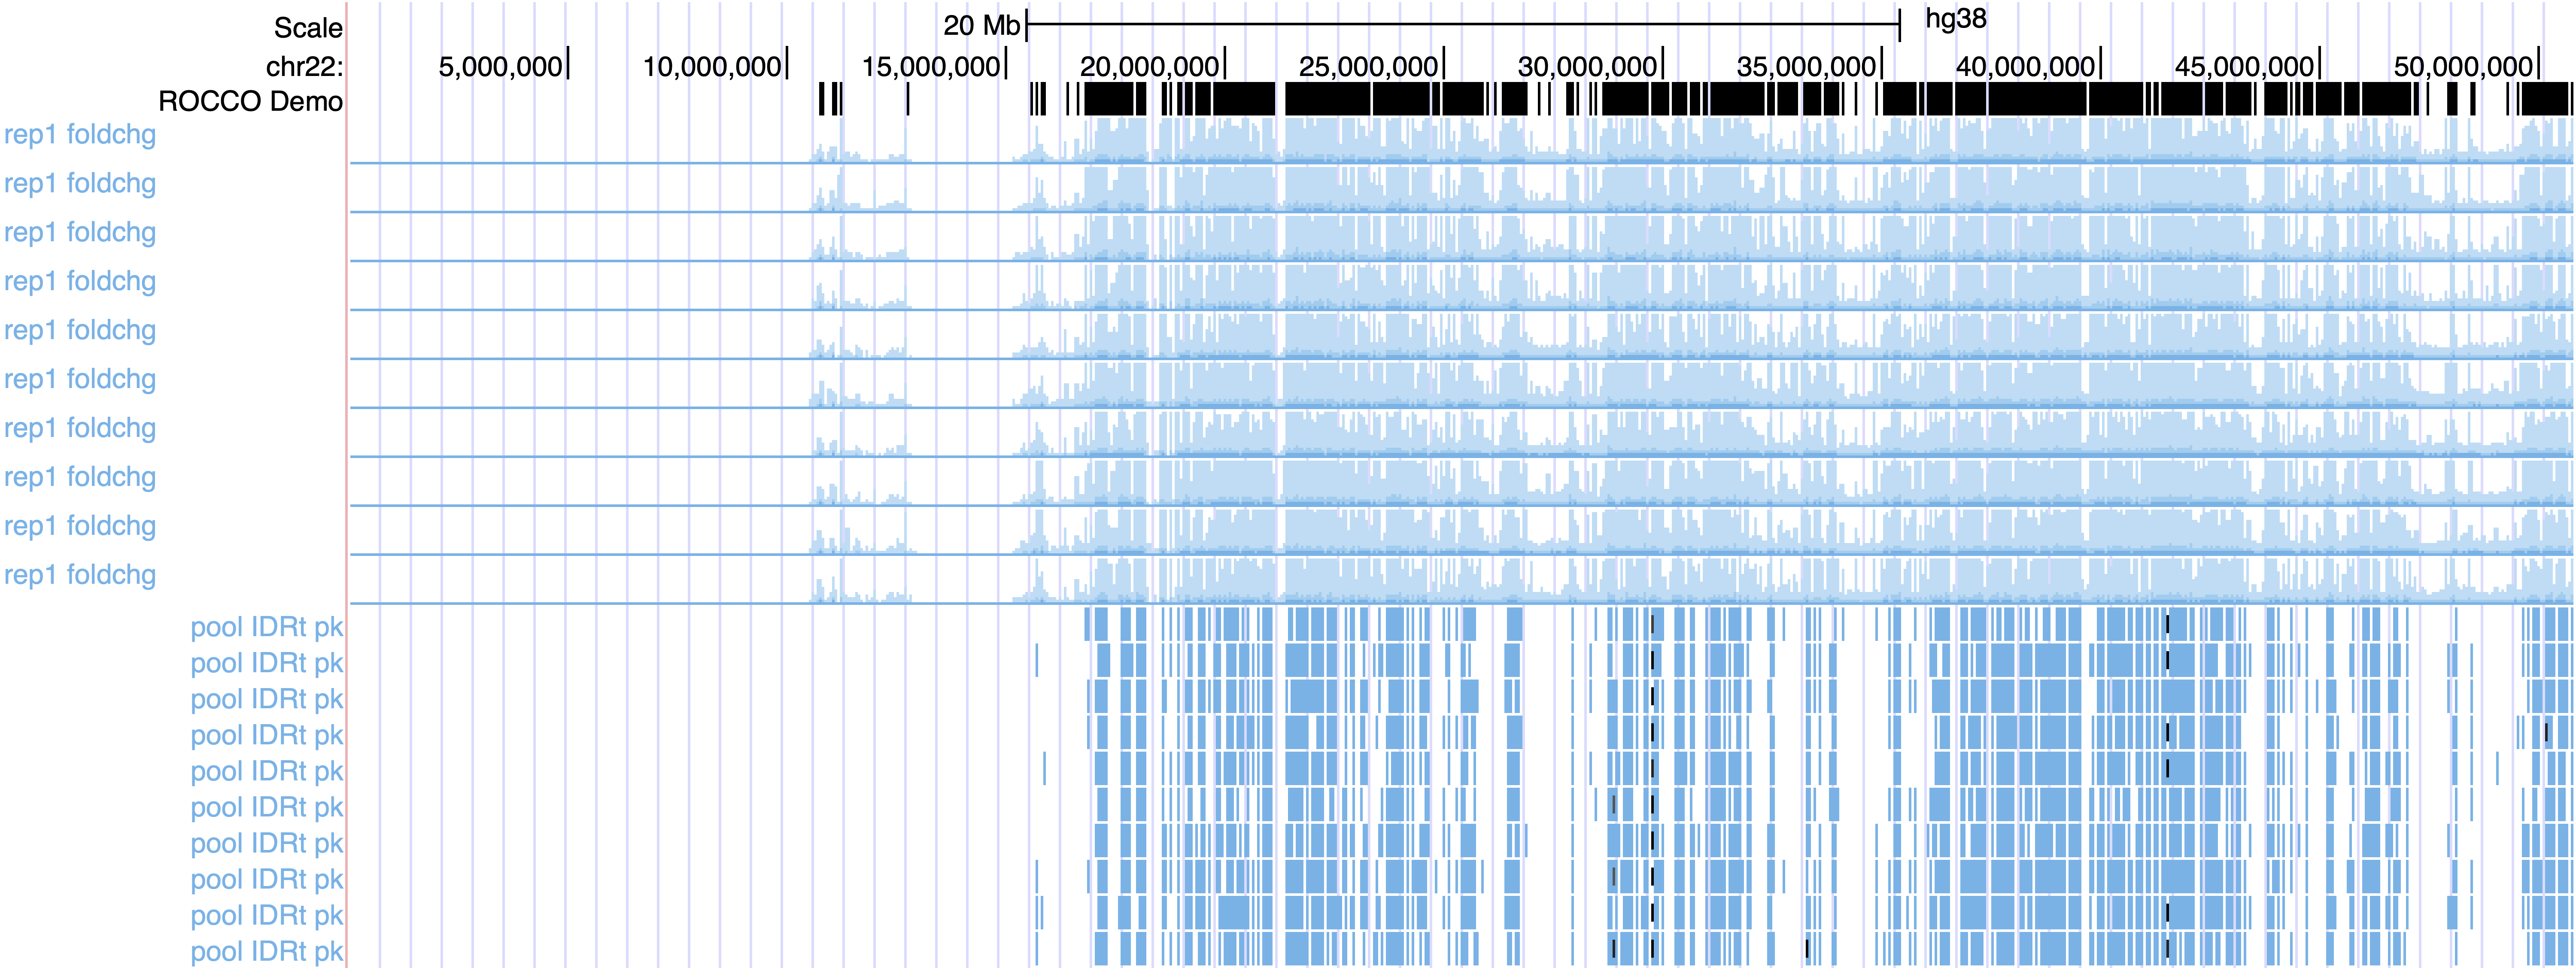


### ROCCO predicted peak regions over a random 5mb region in `chr22`
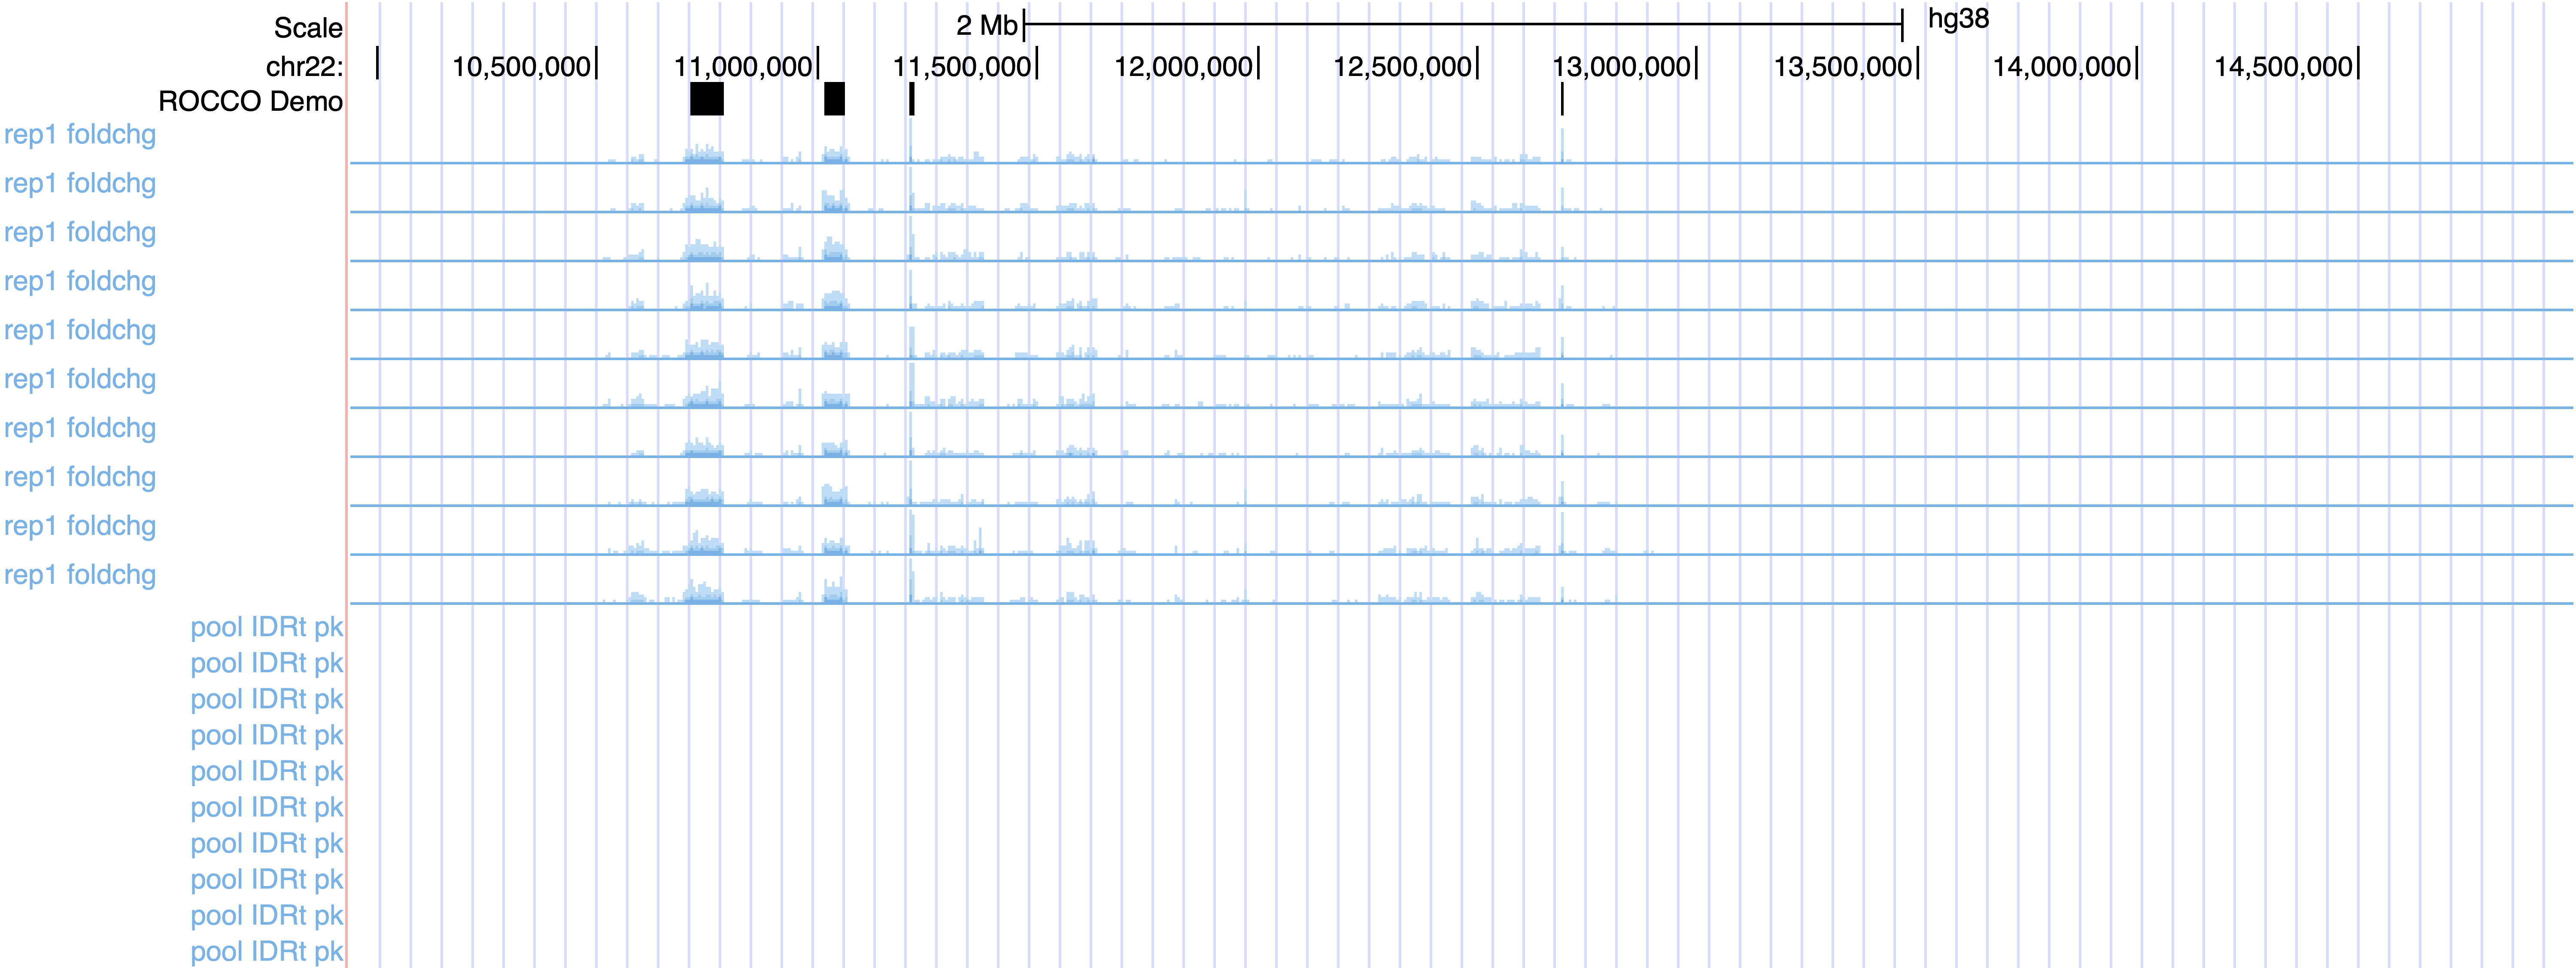